### import les bibliotheque

In [218]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier

### afficher le dataset

In [219]:
# Charger le jeu de données Boston Housing
boston = fetch_openml(name='Boston', version=1)
boston
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target

# Afficher les premières lignes du DataFrame
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### analyser le dataset

In [220]:
print("ligne_clonnee : ", df.shape ,  "size : " , df.size  , " dimensions : " , df.ndim )

ligne_clonnee :  (506, 14) size :  7084  dimensions :  2


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [222]:
df.columns.tolist()

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

- CRIM – Taux de criminalité par habitant

- ZN – Proportion de terrains résidentiels de plus de 25 000 pieds carrés

- INDUS – Proportion de surfaces non commerciales (zones industrielles)

- CHAS – Variable fictive (binaire) indiquant la proximité de la rivière Charles (1 si proche, 0 sinon)

- NOX – Concentration en oxydes d’azote (pollution de l’air)

- RM – Nombre moyen de pièces par logement

- AGE – Proportion de logements construits avant 1940

- DIS – Distance moyenne aux cinq centres d’emploi de Boston

- RAD – Accessibilité aux autoroutes radiales

- TAX – Taux d'imposition foncière par 10 000 dollars

- PTRATIO – Ratio élèves/enseignants par ville

- B – 1000×(𝐵𝑘−0.63)21000×(Bk−0.63) 2 avec 𝐵𝑘 Bk étant la proportion de Noirs par ville (interprétation discutable)

- LSTAT – Pourcentage de la population à faible statut socio-économique

- MEDV – Valeur médiane des maisons occupées par leur propriétaire (en milliers de dollars)

In [223]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [224]:
### Convertire les  données en float
df["CHAS"]= df["CHAS"].astype(float)
df["RAD"] = df["RAD"].astype(float)
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [225]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: ylabel='CRIM'>

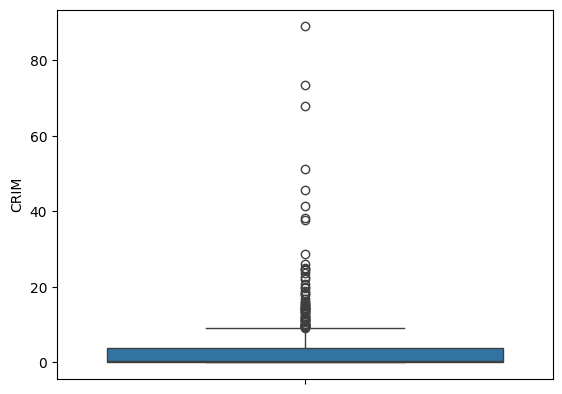

In [226]:
sns.boxplot(df["CRIM"])

In [227]:
# # Fonction pour supprimer les valeurs aberrantes via IQR
# def remove_outliers_iqr(df):
#     df_clean = df.copy()
#     for col in df_clean.select_dtypes(include=['float64', 'int64']).columns:
#         Q1 = df_clean[col].quantile(0.25)
#         Q3 = df_clean[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR

#         # On filtre les lignes dans les bornes
#         df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
#     return df_clean

# # Application
# df_cleaned = remove_outliers_iqr(df)

In [228]:
# df_cleaned.describe()

<Axes: xlabel='CRIM', ylabel='MEDV'>

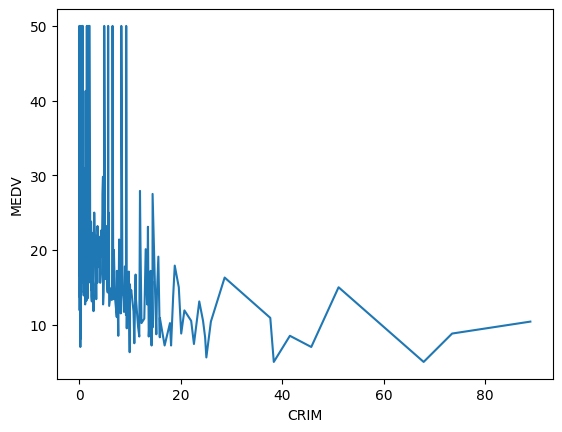

In [229]:
sns.lineplot(x=df["CRIM"], y=df["MEDV"])

<Axes: >

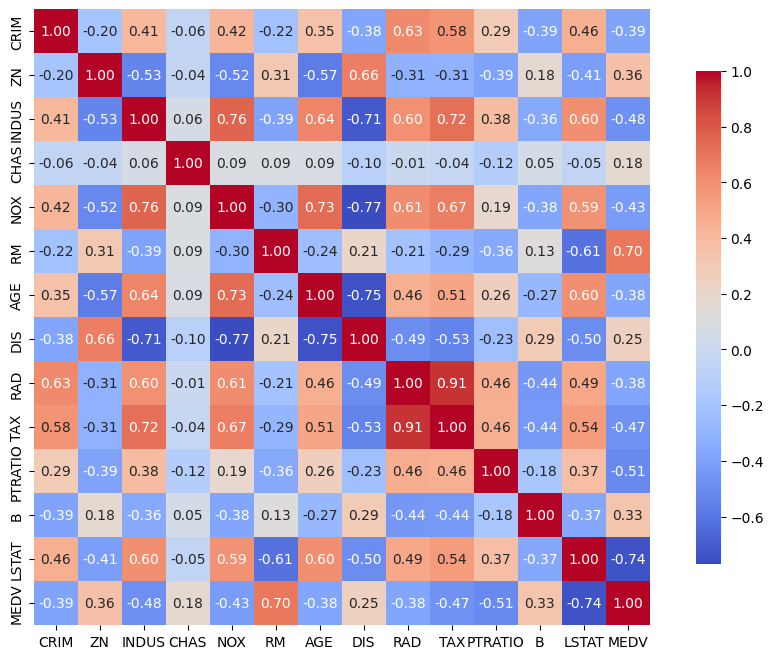

In [230]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})

In [231]:
## Multiplication des données par 10
df = pd.concat([df]*1000, ignore_index=True)
## Amelioration

### Préparation des donnée

In [232]:
## devisonsion du dataset
Y = df["MEDV"]
X = df.drop(columns=["MEDV"])

# Division des données en ensembles d'entraînement et de test
x_train , x_test , y_train, y_test = train_test_split(X, Y , test_size=0.2, random_state=42)


x_test.shape , x_train.shape , y_test.shape , y_train.shape

((101200, 13), (404800, 13), (101200,), (404800,))

<Axes: >

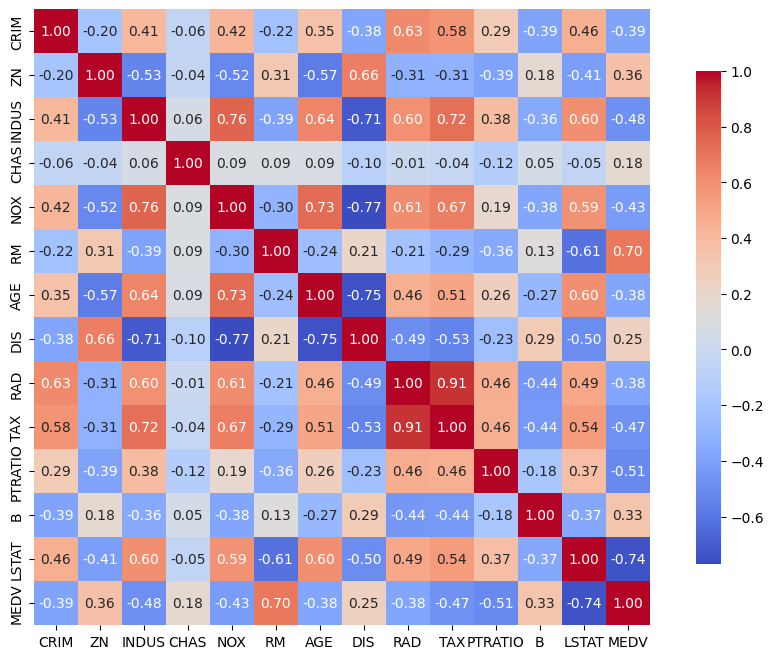

In [233]:
## normalisation du dataset
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
# Affichage de la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})

### Entraînement d'un modèle

In [234]:
## creation du model 
model = LinearRegression()

## entrainement du model
model.fit(x_train_scaled, y_train)

LinearRegression()

### Évaluation du modèle

In [237]:
y_pred = model.predict(x_test_scaled)

# Calcul des métriques d'évaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("mean_squared_error : " ,  mse , "coéfficient_de_determination :" , r2 * 100 , "%")

mean_squared_error :  22.254318663838987 coéfficient_de_determination : 73.66697598404255 %
